In [2]:
# X high-dimensional vector in the feature space
# r low-dimensional vector in the representation space 
# example vector m_r

# Steps:
# Step 0: assign m_r random values from the feature space
# Step 1: find index r* of the m_r closest to X_t
# Step 2: shift all m_r with r values close to r* via:
# m_r = m_r + alpha exp(-d(r, r*)**2/2sigma**2)(X_t-m_r)
# Iteratively repeat steps 1 and 2

In [3]:
import numpy as np
from numpy.random import rand
import math
import matplotlib.pyplot as plt

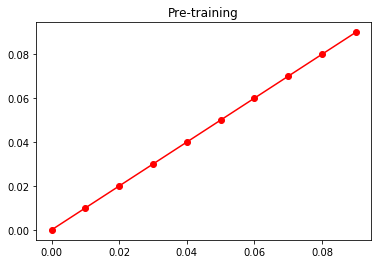

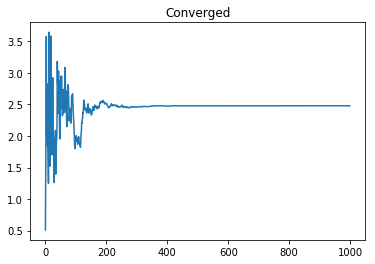

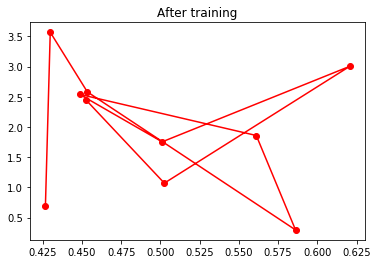

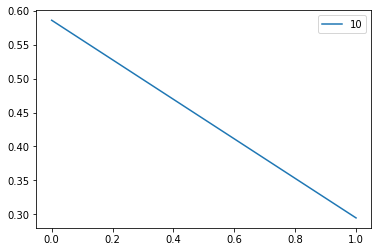

In [29]:
# Hyperparameters
np.random.seed(14)
a = 1
b = 4
i = 1
N = 10 #10, 50, 100
T = 10
dt = 0.01
n = int(T / dt)
alpha = 1
sigma = 1

# Random values from 0 to a and 0 to b
X = np.array([rand(1) * a, rand(1) * b])
r = rand(N, 1) * i

# Step 0:
m = np.zeros((r.shape[0], 2))
c = 0
for i in range(len(r)):
    #m[i] = np.array([np.random.uniform(0, a), np.random.uniform(0, b)])
    m[i] = [c, c]
    c += dt

plt.title("Pre-training")
plt.plot(m[:,0], m[:,1], 'ro-')
plt.show()

mh = np.empty(n)
for t in range(n):
    X = np.array([np.random.uniform(0, a), np.random.uniform(0, b)])
    # Step 1:
    def d(x, y):
        assert x.shape == y.shape
        d = 0
        for i in range(len(x)):
            d += (x[i] - y[i])**2
        return math.sqrt(d)
    rs = 0
    closest_d = math.inf
    for i, m_r in enumerate(m):
        distance = d(m_r, X)
        if distance < closest_d:
            rs = r[i]
            closest_d = distance

    # Step 2:
    alpha *= 0.99
    sigma *= 0.99
    for i, m_r in enumerate(m):
        m[i] = m_r + alpha * np.exp(-d(r[i], rs)**2 / sigma**2) * (X - m_r)
    
    # Just something to show whether m has converged or not
    mh[t] = np.sum(m) / N

plt.title("Converged")
plt.plot(np.arange(0, n), mh)
plt.show()
plt.title("After training")
plt.plot(m[:,0], m[:,1], 'ro-')
plt.show()

perm = np.array([np.where(x == r.flatten()) for x in np.sort(r, 0)]).flatten()

m_line = []
for i in perm:
    m_line.append(m[i])
plt.plot(m[i], label=len(m_line))
plt.legend()
plt.show()

2.b) I don't see an effect of increasing N in the representation space

2.c) I don't understand how to get a single line

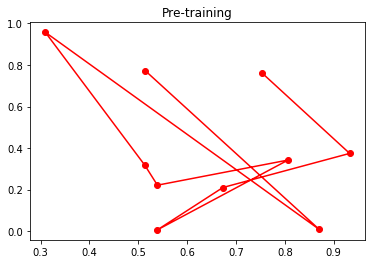

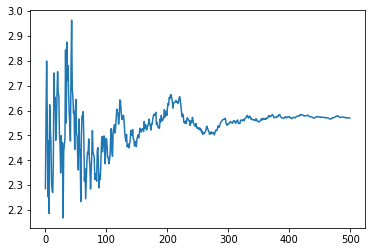

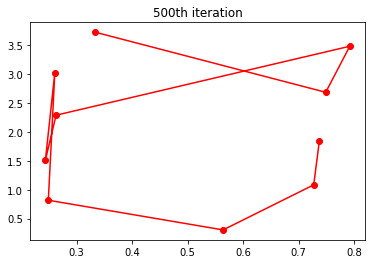

In [42]:
import math

np.random.seed(14)

a = 1
b = 4 
N = [10,50,100,200]
r = N[0]

alpha=1;
sigma=1;


n_iterations = 500
n_adjustments = 50
t = 1 

#input vectors 2D
# X = np.random.uniform(0, 1, (n_iterations,2))
mr = np.random.uniform(0, 1, (r,2)) 

# mr = np.zeros((r, 2))
# c = 0.00
# for i in range(0, r):
#     mr[i] = [c,c]
#     c += 0.01


# plt.scatter(X[:,0],X[:,1],label = 'Data')
plt.figure()
plt.plot(mr[:,0], mr[:,1], 'ro-', label = "line")
plt.title("Pre-training")
plt.show()

samples = np.zeros((n_iterations, r*2, 2))
mh = np.empty(n_iterations)
for i in range(n_iterations):

    for l in range(0, r*2):

        # samp = X[i]
        samp = np.array([np.random.uniform(0, a), np.random.uniform(0, b)])
        samples[i, l] = samp

        distances = []
        for j in range(0, r):
            # distances.append(euclid(mr[j], samp))
            d = np.sqrt(np.sum((mr[j] - samp)**2))
            distances.append(d)

        # min distance vector
        r_star = np.argmin(np.array(distances))
        
        neighbours = np.arange(-int(r*.1), int(r*.1)+1)
        # neighbours = [-2,-1,0,1,2]
        for n in neighbours:
            r_k = r_star + n
            if r_k >= 0 and r_k < r:
                mr[r_k] = mr[r_k] + alpha*math.exp(-(r_k - r_star)**2 / (2*sigma**2))*(samp - mr[r_k])

    alpha *= 0.99
    sigma *= 0.99
    
    mh[i] = np.sum(mr) / r

plt.plot(np.arange(0, n_iterations), mh)
plt.show()
    
plt.figure()
# plt.scatter(samples[:,:,0], samples[:,:,1])
plt.plot(mr[:,0], mr[:,1], 'ro-', label = "line")
plt.title(f"{i+1}th iteration")
plt.show()

In [48]:
print(mr[0,0], mr[0, 1])

0.3337270671956243 3.726723869830105
